********************************
encoded reviews: [[49, 32, 33], [29, 26], [22, 36], [49, 14], [29, 14], [8], [8, 36], [16], [41, 2], [36, 2, 48, 18]]
********************************
[[49 32 33  0]
 [29 26  0  0]
 [22 36  0  0]
 [49 14  0  0]
 [29 14  0  0]
 [ 8  0  0  0]
 [ 8 36  0  0]
 [16  0  0  0]
 [41  2  0  0]
 [36  2 48 18]]
********************************
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
__________________

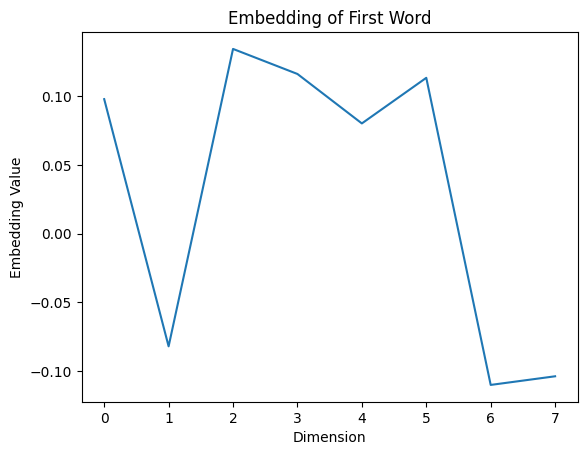

In [3]:
import numpy as np
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense
import matplotlib.pyplot as plt
# Define 10 restaurant reviews
reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]
#Define labels
labels = array([1,1,1,1,1,0,0,0,0,0])
print("********************************")
#
Vocab_size = 50
encoded_reviews = [one_hot(d,Vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')
print("********************************")
#
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)
print("********************************")
#
model = Sequential()
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())
print("********************************")
model.fit(padded_reviews,labels,epochs=100,verbose=0)
print(embedding_layer.get_weights()[0].shape)
print("********************************")
#kiểm tra phần nhúng của từ đầu tiên
print(embedding_layer.get_weights()[0][0])

#
embedding_weights = embedding_layer.get_weights()[0]
first_word_embedding = embedding_weights[0]

plt.plot(np.arange(len(first_word_embedding)), first_word_embedding)
plt.xlabel('Dimension')
plt.ylabel('Embedding Value')
plt.title('Embedding of First Word')
plt.show()